In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np
from nltk.probability import FreqDist

In [4]:
# ! pip install statsmodels

# Importation

In [5]:
df = pd.read_csv('database.csv', 
                dtype={'channelId': str,'videoId': str, 'author': str, 'comment':str}, 
                parse_dates=['publishedAt','extractedAt'])
# df['channelId'] = df['channelId'].astype(str)  # Convertir la colonne 'channelId' en chaîne de caractères
# df['videoId'] = df['videoId'].astype(str)  # Convertir la colonne 'videoId' en chaîne de caractères
# df['author'] = df['author'].astype(str)  # Convertir la colonne 'author' en chaîne de caractères
# df['comment'] = df['comment'].astype(str) 
df.head()

,channelId,videoId,author,publishedAt,comment,extractedAt
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10


# EDA premier niveau :comptage et distibution

In [6]:
df.describe()

,extractedAt
count,1731
mean,2025-07-01 11:46:20.023685632
min,2025-07-01 11:46:10
25%,2025-07-01 11:46:15
50%,2025-07-01 11:46:20
75%,2025-07-01 11:46:25
max,2025-07-01 11:46:31


In [7]:
df.dtypes

channelId                   object
videoId                     object
author                      object
publishedAt    datetime64[ns, UTC]
comment                     object
extractedAt         datetime64[ns]
dtype: object

In [8]:
# le nombre de commentaires
print(f'Nombre de commentaires : {df.shape[0]}')
df['author'].nunique()  
# le nombre d'utilisateurs uniques
print(f'Nombre d\'utilisateurs uniques : {df["author"].nunique()}')
# le nombre de commentaires par utilisateur
print(f'Nombre moyen de commentaires par utilisateur : {df.groupby("author").size().mean():.2f}')

Nombre de commentaires : 1731
Nombre d'utilisateurs uniques : 1675
Nombre moyen de commentaires par utilisateur : 1.03


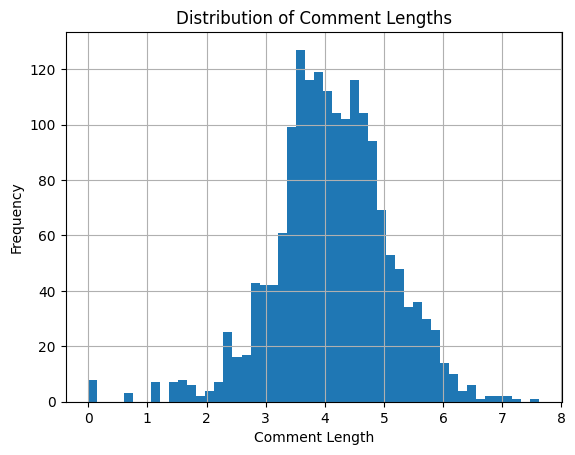

In [9]:
# la distribution de la longueur des commentaires
df['comment_length'] = df['comment'].str.len()
np.log(df['comment_length']).hist(bins=50)
# df['comment_length'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()

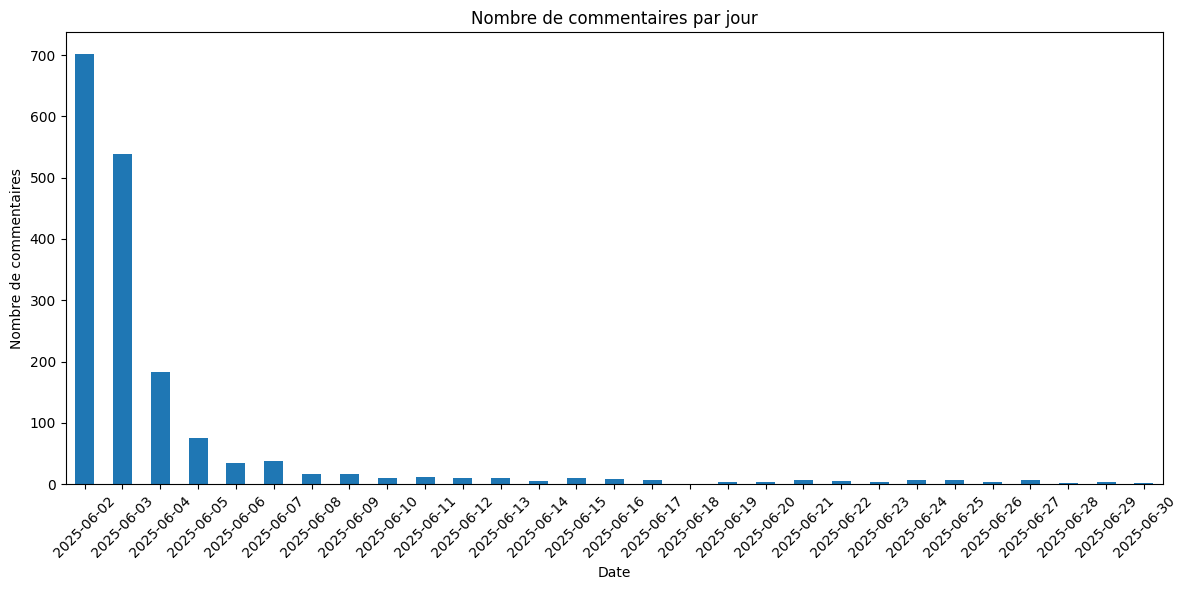

In [10]:
# le nombre de commentaires par jour
df['date'] = df['publishedAt'].dt.date
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Nombre de commentaires par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de commentaires')
plt.xticks(rotation=45)
plt.tight_layout()

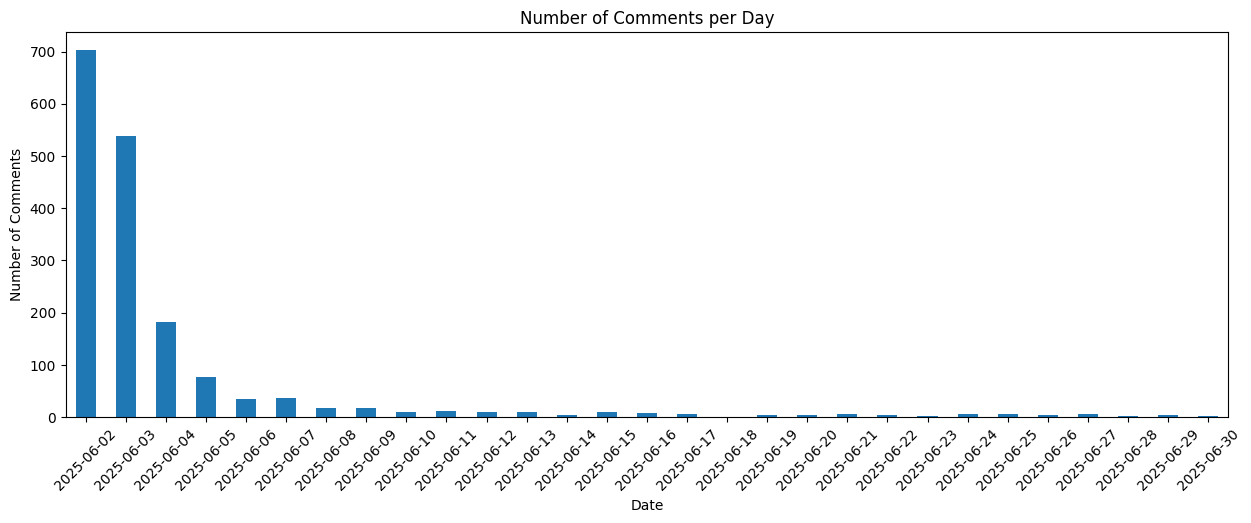

In [11]:
# le nombre de commentaires par utilisateur
df['author'].value_counts().head(10)
# le nombre de commentaires par jour
df['date'] = df['publishedAt'].dt.date
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.show()

# EDA deuxième niveau : analyse du texte

<Axes: title={'center': 'Most Common Words in Comments'}, xlabel='Samples', ylabel='Counts'>

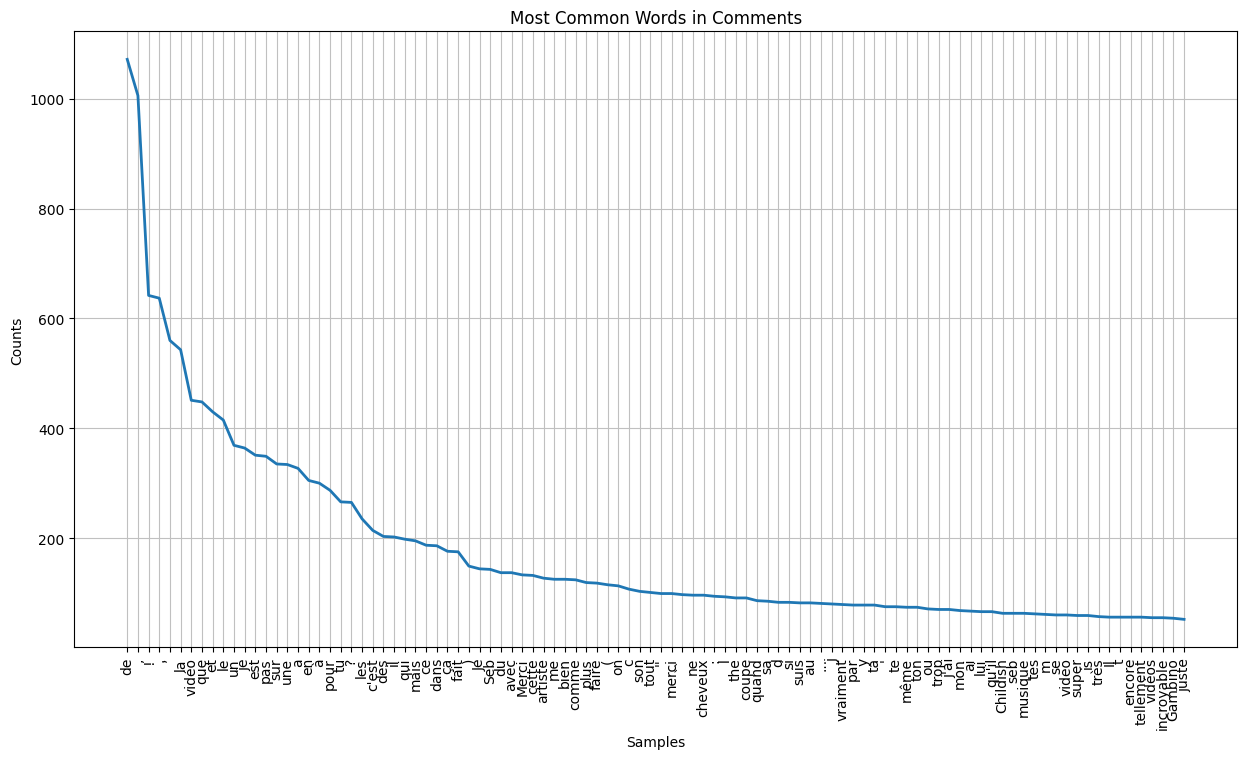

In [12]:
text = nltk.word_tokenize(' '.join(df['comment'].dropna()))
raw = nltk.Text(text)
fdistr = FreqDist(raw)
# freqDist ne fonctionne que sur des fichiers traités or c'est ce qu'on a fait avec le découpage en mot
# donc ça compte bien la fréquence des mots
# si on prend le fichier brut sans le couper en mots ça compte la fréquence de caractères
plt.figure(figsize=(15, 8))
fdistr.plot(100, cumulative=False, title='Most Common Words in Comments')

In [13]:
# le nombre de mots uniques
unique_words = set(nltk.word_tokenize(' '.join(df['comment'].dropna())))

print(f'Nombre de mots uniques : {len(unique_words)}, le nombre de mots :{df["comment"].str.split().str.len().sum()}')

Nombre de mots uniques : 5795, le nombre de mots :30712.0


# Data set d'entainement

## les tweets

In [14]:
df_train = pd.read_csv('../data/french_tweets.csv')
df_train.head()
df_train.shape

(1526724, 2)

## les commentaires youtube

In [15]:
# !pip install kagglehub
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("amaanpoonawala/youtube-comments-sentiment-dataset")
# print("Path to dataset files:", path)

In [16]:
# df_test = pd.read_csv('../data/youtube_comments_cleaned.csv')
# print(df_test.shape)
# df_test.head()

In [17]:
df_test = pd.read_csv('/Users/carla/Desktop/GitHub/Projet-RNCP/data/youtube_comments_cleaned.csv')
df_test.groupby('VideoID')['CommentID'].count().reset_index().sort_values(by='CommentID', ascending=False)


,VideoID,CommentID
123,0gASceRnltg,1192
1640,Lzccd-ol1Ks,1177
60,-hV6aeyPHPA,1151
1481,JarGs7pGbt8,1090
851,B4pc-6ZKBjg,1003
...,...,...
2168,T5Vo50IT9hc,5
4530,zcCYuF9lQUM,3
3638,n-HVPGEDWwo,3
530,6j5FqstHavw,1


In [18]:
df_test1 = df_test[df_test['VideoID'] == "0gASceRnltg"]
df_test1.shape

(1192, 12)

In [19]:
df_train2 = pd.read_csv('/Users/carla/Downloads/partial_translation_1754977652.csv')
print(df_train2.shape)
df_train2.head()

(50000, 13)


,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,text_fr
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,Quelqu'un sait quel film c'est ?
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,Le fait qu'ils se retiennent tout en étant aus...
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,Vous attendez la prochaine vidéo ?
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,Merci pour la grande vidéo. Je ne comprends pa...
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,"C'est comme ça qu'on est en Amérique, à l'exce..."


In [27]:
df_train2.groupby('VideoID')['CommentID'].count().reset_index().sort_values(by='CommentID', ascending=False)


,VideoID,CommentID
1627,Lzccd-ol1Ks,65
122,0gASceRnltg,62
4489,zUUHdx1oa0s,61
59,-hV6aeyPHPA,58
2199,TloMiwQv1x4,56
...,...,...
1581,LEtGIJZDM1s,1
2313,VRIMurxEII4,1
1837,Oioo0IdoEls,1
1247,GOkROxFp_Ew,1


# comparaison des 2 data set d'entrainement 

## distribution des labels

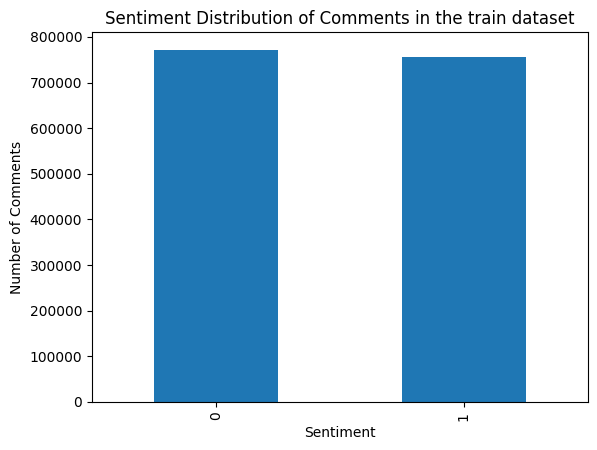

In [20]:
# distribution des commentaires en fonction des sentiments
df_train["label"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments in the train dataset')
plt.show()

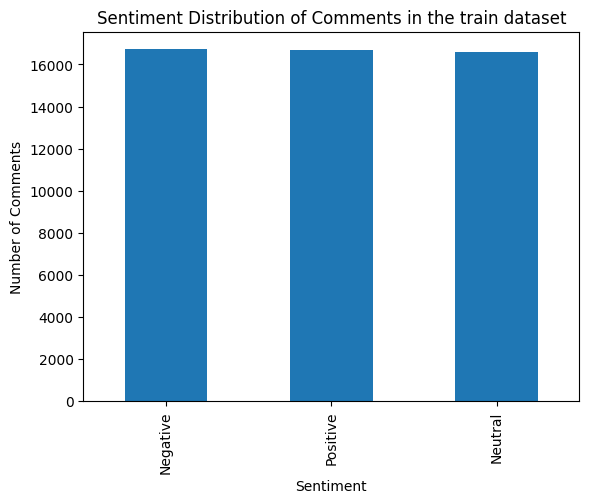

In [21]:
# distribution des commentaires en fonction des sentiments
df_train2["Sentiment"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments in the train dataset')
plt.show()

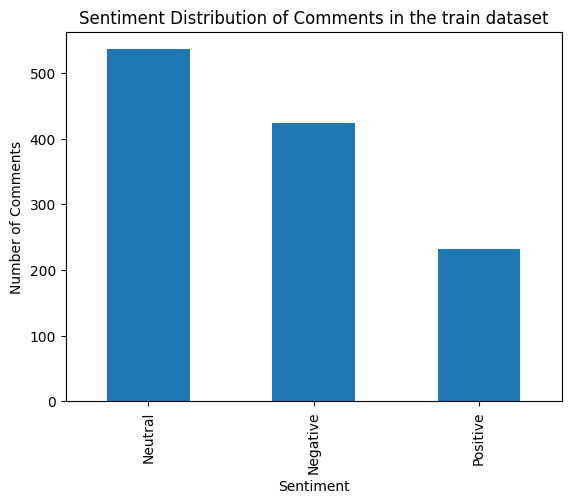

In [22]:
# distribution des commentaires en fonction des sentiments
df_test1["Sentiment"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments in the train dataset')
plt.show()

## distribution de la longueur des commentaires

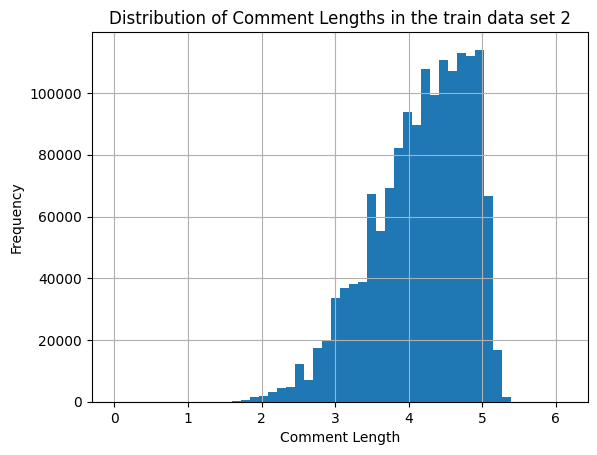

In [23]:
# la distribution de la longueur des commentaires
df_train['comment_length'] = df_train['text'].str.len()
import numpy as np
np.log(df_train['comment_length']).hist(bins=50)
# df_train['comment_length'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths in the train data set 2')
plt.show()

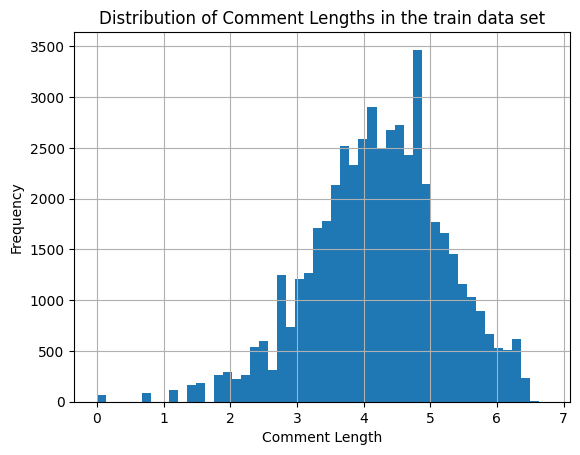

In [24]:
# la distribution de la longueur des commentaires
df_train2['comment_length'] = df_train2['text_fr'].str.len()
import numpy as np
np.log(df_train2['comment_length']).hist(bins=50)
# df_train2['text_fr'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths in the train data set')
plt.show()

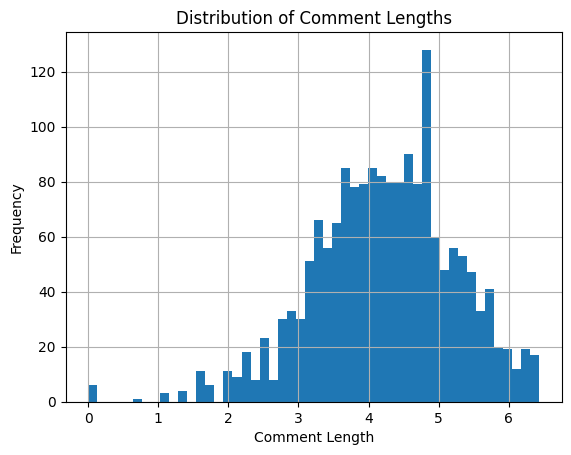

In [25]:
# échantillon de commentaires de 500 000
df_sample = df_train2.sample(n=1730, random_state=25)
# la distribution de la longueur des commentaires
np.log(df_sample['comment_length']).hist(bins=50)
# df_sample['comment_length'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()

In [26]:
# la distribution de la longueur des commentaires
df_test1['comment_length'] = df_test1['text_fr'].str.len()
import numpy as np
np.log(df_test1['comment_length']).hist(bins=50)
# df_test1['text_fr'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths in the train data set')
plt.show()

KeyError: 'text_fr'

## distribution de la longueur de commentaires en fonction du label

In [ ]:
# la distribution de la longeur des commentaires par sentiment
df_train.groupby('label')['comment_length'].mean().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Comment Length')
plt.title('Average Comment Length by Sentiment')
plt.show()

In [ ]:
# la distribution de la longeur des commentaires par sentiment
df_train2.groupby('Sentiment')['comment_length'].mean().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Comment Length')
plt.title('Average Comment Length by Sentiment')
plt.show()

## boxplot

In [ ]:
# boxplot de la longueur des commentaires
df.boxplot(column='comment_length')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.title('Boxplot of Comment Lengths ')
#plt.suptitle('')  # Suppress the default title
plt.show()
df.describe().round()

In [ ]:
# boxplot de la longueur des commentaires
df_train.boxplot(column='comment_length')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.title('Boxplot of Comment Lengths')
#plt.suptitle('')  # Suppress the default title
plt.show()
df_train.describe().round()

In [ ]:
# boxplot de la longueur des commentaires
df_train2.boxplot(column='comment_length')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.title('Boxplot of Comment Lengths')
#plt.suptitle('')  # Suppress the default title
plt.show()
df_train2.describe().round()

In [ ]:
# boxplot de la longueur des commentaires
df_sample.boxplot(column='comment_length')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.title('Boxplot of Comment Lengths')
#plt.suptitle('')  # Suppress the default title
plt.show()
df_sample.describe().round()

# tests de similarité avec la cible

### distribution

In [ ]:
# test de distribution
# qqplot
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

lengths = df_train2['comment_length'] # ta série de longueurs (1 032 225 valeurs)

# 1. Q-Q plot
sm.graphics.qqplot(lengths, line='s')
plt.title("Q-Q plot des longueurs")
plt.show()

# 2. Anderson-Darling
ad = stats.anderson(lengths, dist='norm')
print("Anderson-Darling statistique:", ad.statistic)
print("Seuils critiques:", ad.critical_values, "niveau:", ad.significance_level)

# 3. D’Agostino-Pearson (normaltest)
k2, p = stats.normaltest(lengths)
print("D’Agostino-Pearson K2:", k2, "p-value:", p)

In [ ]:
import numpy as np
from scipy import stats

x = np.array(df['comment_length']) # longueur distribution A
y = np.array(df_train2['comment_length'])  # distribution B

# Mann–Whitney U test
u_stat, p_u = stats.mannwhitneyu(x, y, alternative='two-sided')
print("Mann–Whitney U:", u_stat, "p-value:", p_u)
# Mann–Whitney U: 878423157.0 p-value: 0.2439929903263628


In [ ]:
# plot des distribution supperposé entre les deux séries
# !pip install seaborn
import seaborn as sns
sns.kdeplot(df['comment_length'], label='Dataset A', color='blue')
sns.kdeplot(df_train2['comment_length'], label='Dataset B', color='orange')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.title('KDE Plot of Comment Lengths')
plt.legend()
plt.show()

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Télécharger les ressources NLTK si nécessaire
# nltk.download('punkt')
# nltk.download('stopwords')

class VocabularySimilarityAnalyzer:
    def __init__(self, language='french'):
        """
        Analyseur de similitude de vocabulaire entre datasets
        
        Args:
            language: Langue pour les mots vides ('french', 'english', etc.)
        """
        self.language = language
        try:
            self.stop_words = set(stopwords.words(language))
        except:
            print(f"Langue {language} non supportée, utilisation de l'anglais par défaut")
            self.stop_words = set(stopwords.words('english'))
        
        self.vocab1 = None
        self.vocab2 = None
        self.freq1 = None
        self.freq2 = None
    
    def preprocess_text(self, text):
        """
        Préprocessing du texte pour extraire les mots
        
        Args:
            text: Texte brut
            
        Returns:
            Liste de mots nettoyés
        """
        if pd.isna(text):
            return []
        
        # Conversion en minuscules
        text = str(text).lower()
        
        # Suppression des caractères non alphabétiques
        text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', ' ', text)
        
        # Tokenisation
        words = word_tokenize(text)
        
        # Filtrage des mots vides et mots trop courts
        words = [word for word in words 
                if word not in self.stop_words and len(word) > 2]
        
        return words
    
    def extract_vocabulary(self, texts, min_freq=1):
        """
        Extraction du vocabulaire d'un corpus
        
        Args:
            texts: Liste ou série de textes
            min_freq: Fréquence minimale pour garder un mot
            
        Returns:
            tuple: (vocabulaire, fréquences)
        """
        all_words = []
        
        for text in texts:
            words = self.preprocess_text(text)
            all_words.extend(words)
        
        # Comptage des fréquences
        freq_counter = Counter(all_words)
        
        # Filtrage par fréquence minimale
        filtered_vocab = {word: freq for word, freq in freq_counter.items() 
                         if freq >= min_freq}
        
        return set(filtered_vocab.keys()), filtered_vocab
    
    def jaccard_similarity(self, set1, set2):
        """
        Calcul de la similitude de Jaccard
        
        Args:
            set1, set2: Ensembles à comparer
            
        Returns:
            float: Coefficient de Jaccard (0-1)
        """
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        
        if union == 0:
            return 0.0
        
        return intersection / union
    
    def overlap_coefficient(self, set1, set2):
        """
        Calcul du coefficient de recouvrement (overlap)
        
        Args:
            set1, set2: Ensembles à comparer
            
        Returns:
            float: Coefficient de recouvrement (0-1)
        """
        intersection = len(set1.intersection(set2))
        min_size = min(len(set1), len(set2))
        
        if min_size == 0:
            return 0.0
        
        return intersection / min_size
    
    def dice_coefficient(self, set1, set2):
        """
        Calcul du coefficient de Dice
        
        Args:
            set1, set2: Ensembles à comparer
            
        Returns:
            float: Coefficient de Dice (0-1)
        """
        intersection = len(set1.intersection(set2))
        total_size = len(set1) + len(set2)
        
        if total_size == 0:
            return 0.0
        
        return 2 * intersection / total_size
    
    def frequency_correlation(self, freq1, freq2):
        """
        Calcul de la corrélation des fréquences pour les mots communs
        
        Args:
            freq1, freq2: Dictionnaires de fréquences
            
        Returns:
            float: Coefficient de corrélation de Pearson
        """
        common_words = set(freq1.keys()).intersection(set(freq2.keys()))
        
        if len(common_words) < 2:
            return 0.0
        
        freqs1 = [freq1[word] for word in common_words]
        freqs2 = [freq2[word] for word in common_words]
        
        return np.corrcoef(freqs1, freqs2)[0, 1]
    
    def tfidf_similarity(self, texts1, texts2, max_features=5000):
        """
        Calcul de la similitude TF-IDF entre deux corpus
        
        Args:
            texts1, texts2: Listes de textes
            max_features: Nombre maximum de features TF-IDF
            
        Returns:
            float: Similitude cosinus moyenne
        """
        # Préprocessing des textes
        processed_texts1 = [' '.join(self.preprocess_text(text)) for text in texts1]
        processed_texts2 = [' '.join(self.preprocess_text(text)) for text in texts2]
        
        # Vectorisation TF-IDF sur le corpus combiné
        vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2))
        all_texts = processed_texts1 + processed_texts2
        
        # Fit sur tous les textes
        vectorizer.fit(all_texts)
        
        # Transform séparément
        tfidf1 = vectorizer.transform(processed_texts1)
        tfidf2 = vectorizer.transform(processed_texts2)
        
        # Calcul des centroïdes
        centroid1 = np.mean(tfidf1.toarray(), axis=0)
        centroid2 = np.mean(tfidf2.toarray(), axis=0)
        
        # Similitude cosinus entre les centroïdes
        similarity = cosine_similarity([centroid1], [centroid2])[0, 0]
        
        return similarity
    
    def analyze_vocabulary_similarity(self, texts1, texts2, min_freq=2):
        """
        Analyse complète de la similitude de vocabulaire
        
        Args:
            texts1, texts2: Listes de textes à comparer
            min_freq: Fréquence minimale pour inclusion dans le vocabulaire
            
        Returns:
            dict: Dictionnaire avec toutes les métriques
        """
        print("=== ANALYSE DE SIMILITUDE DE VOCABULAIRE ===\n")
        
        # Extraction des vocabulaires
        print("Extraction des vocabulaires...")
        self.vocab1, self.freq1 = self.extract_vocabulary(texts1, min_freq)
        self.vocab2, self.freq2 = self.extract_vocabulary(texts2, min_freq)
        
        # Statistiques de base
        print(f"Dataset 1: {len(texts1)} textes, {len(self.vocab1)} mots uniques")
        print(f"Dataset 2: {len(texts2)} textes, {len(self.vocab2)} mots uniques")
        
        # Calcul des métriques de similitude
        jaccard = self.jaccard_similarity(self.vocab1, self.vocab2)
        overlap = self.overlap_coefficient(self.vocab1, self.vocab2)
        dice = self.dice_coefficient(self.vocab1, self.vocab2)
        freq_corr = self.frequency_correlation(self.freq1, self.freq2)
        
        print(f"\n=== MÉTRIQUES DE SIMILITUDE ===")
        print(f"Coefficient de Jaccard: {jaccard:.4f}")
        print(f"Coefficient de recouvrement: {overlap:.4f}")
        print(f"Coefficient de Dice: {dice:.4f}")
        print(f"Corrélation des fréquences: {freq_corr:.4f}")
        
        # Calcul TF-IDF (peut être lent sur de gros datasets)
        if len(texts1) <= 10000 and len(texts2) <= 10000:
            print("\nCalcul de la similitude TF-IDF...")
            tfidf_sim = self.tfidf_similarity(texts1, texts2)
            print(f"Similitude TF-IDF: {tfidf_sim:.4f}")
        else:
            tfidf_sim = None
            print("Dataset trop volumineux pour TF-IDF, calcul ignoré")
        
        # Analyse des mots communs et différents
        common_words = self.vocab1.intersection(self.vocab2)
        only_in_1 = self.vocab1 - self.vocab2
        only_in_2 = self.vocab2 - self.vocab1
        
        print(f"\n=== ANALYSE DU VOCABULAIRE ===")
        print(f"Mots communs: {len(common_words)}")
        print(f"Mots uniquement dans dataset 1: {len(only_in_1)}")
        print(f"Mots uniquement dans dataset 2: {len(only_in_2)}")
        
        results = {
            'jaccard': jaccard,
            'overlap': overlap,
            'dice': dice,
            'frequency_correlation': freq_corr,
            'tfidf_similarity': tfidf_sim,
            'vocab_size_1': len(self.vocab1),
            'vocab_size_2': len(self.vocab2),
            'common_words': len(common_words),
            'unique_to_1': len(only_in_1),
            'unique_to_2': len(only_in_2),
            'common_words_list': list(common_words),
            'unique_to_1_list': list(only_in_1),
            'unique_to_2_list': list(only_in_2)
        }
        
        return results
    
    def plot_vocabulary_analysis(self, results, save_path=None):
        """
        Visualisation des résultats d'analyse
        
        Args:
            results: Résultats de analyze_vocabulary_similarity
            save_path: Chemin pour sauvegarder le graphique (optionnel)
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Barplot des métriques de similitude
        metrics = ['Jaccard', 'Overlap', 'Dice', 'Freq. Correlation']
        values = [results['jaccard'], results['overlap'], 
                results['dice'], results['frequency_correlation']]
        
        ax1.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
        ax1.set_title('Métriques de Similitude', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Score de similitude')
        ax1.set_ylim(0, 1)
        
        # Ajout des valeurs sur les barres
        for i, v in enumerate(values):
            ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # 2. Diagramme en camembert du vocabulaire
        sizes = [results['common_words'], results['unique_to_1'], results['unique_to_2']]
        labels = ['Mots communs', 'Uniques dataset 1', 'Uniques dataset 2']
        colors = ['lightblue', 'lightcoral', 'lightgreen']
        
        ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Distribution du Vocabulaire', fontsize=14, fontweight='bold')
        
        # 3. Comparaison des tailles de vocabulaire
        datasets = ['Dataset 1', 'Dataset 2']
        vocab_sizes = [results['vocab_size_1'], results['vocab_size_2']]
        
        ax3.bar(datasets, vocab_sizes, color=['steelblue', 'darkorange'])
        ax3.set_title('Tailles des Vocabulaires', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Nombre de mots uniques')
        
        for i, v in enumerate(vocab_sizes):
            ax3.text(i, v + max(vocab_sizes) * 0.01, str(v), ha='center', va='bottom', fontweight='bold')
        
        # 4. Heatmap des métriques
        metrics_data = np.array([[results['jaccard'], results['overlap']], 
                                [results['dice'], results['frequency_correlation']]])
        metrics_labels = [['Jaccard', 'Overlap'], ['Dice', 'Freq. Corr.']]
        
        im = ax4.imshow(metrics_data, cmap='RdYlBu_r', vmin=0, vmax=1)
        
        # Ajout des labels et valeurs
        for i in range(2):
            for j in range(2):
                ax4.text(j, i, f'{metrics_labels[i][j]}\n{metrics_data[i, j]:.3f}', 
                        ha='center', va='center', fontweight='bold', fontsize=10)
        
        ax4.set_title('Heatmap des Métriques', fontsize=14, fontweight='bold')
        ax4.set_xticks([])
        ax4.set_yticks([])
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Graphique sauvegardé: {save_path}")
        
        plt.show()
    
    def get_most_frequent_words(self, n=20):
        """
        Obtenir les mots les plus fréquents de chaque dataset
        
        Args:
            n: Nombre de mots à retourner
            
        Returns:
            tuple: (top_words_1, top_words_2)
        """
        if self.freq1 is None or self.freq2 is None:
            raise ValueError("Vous devez d'abord exécuter analyze_vocabulary_similarity")
        
        top_1 = sorted(self.freq1.items(), key=lambda x: x[1], reverse=True)[:n]
        top_2 = sorted(self.freq2.items(), key=lambda x: x[1], reverse=True)[:n]
        
        return top_1, top_2
    
    def interpret_results(self, results):
        """
        Interprétation des résultats de similitude
        
        Args:
            results: Résultats de analyze_vocabulary_similarity
        """
        print("\n=== INTERPRÉTATION DES RÉSULTATS ===")
        
        jaccard = results['jaccard']
        overlap = results['overlap']
        
        if jaccard > 0.7:
            print("✅ EXCELLENTE similitude - Les datasets sont très compatibles")
        elif jaccard > 0.5:
            print("✅ BONNE similitude - Les datasets sont bien compatibles")
        elif jaccard > 0.3:
            print("⚠️  SIMILITUDE MODÉRÉE - Attention au domain shift potentiel")
        elif jaccard > 0.1:
            print("❌ FAIBLE similitude - Risque élevé de domain shift")
        else:
            print("❌ TRÈS FAIBLE similitude - Datasets très différents")
        
        print(f"\nRecommandations:")
        if jaccard < 0.3:
            print("- Considérez du domain adaptation ou transfer learning")
            print("- Augmentez vos données d'entraînement si possible")
            print("- Utilisez des embeddings pré-entraînés robustes")
        
        if overlap > 0.8:
            print("- Bon recouvrement de vocabulaire pour le transfer")
        
        if results['frequency_correlation'] > 0.5:
            print("- Les distributions de mots sont cohérentes")
        elif results['frequency_correlation'] < 0.2:
            print("- Les distributions de mots diffèrent significativement")


def example_usage():
    """
    Exemple d'utilisation
    """
    # Données d'exemple
    dataset1 = [
        "Ce produit est fantastique et de très bonne qualité",
        "Service client excellent, livraison rapide",
        "Je recommande vivement cet article",
        "Excellent rapport qualité prix",
        "Très satisfait de mon achat"
    ]
    
    dataset2 = [
        "Article de qualité moyenne, prix correct",
        "Livraison dans les délais, produit conforme", 
        "Service après-vente réactif et professionnel",
        "Bon produit mais prix un peu élevé",
        "Qualité satisfaisante pour le prix"
    ]
    
    # Analyse
    analyzer = VocabularySimilarityAnalyzer(language='french')
    results = analyzer.analyze_vocabulary_similarity(dataset1, dataset2, min_freq=1)
    
    # Visualisation
    analyzer.plot_vocabulary_analysis(results)
    
    # Interprétation
    analyzer.interpret_results(results)
    
    # Mots les plus fréquents
    top1, top2 = analyzer.get_most_frequent_words(10)
    print(f"\nMots les plus fréquents dataset 1: {top1[:5]}")
    print(f"Mots les plus fréquents dataset 2: {top2[:5]}")




analyzer = VocabularySimilarityAnalyzer(language='french')
results = analyzer.analyze_vocabulary_similarity(
    df['comment'].values, 
    df_train2['text_fr'].values, 
    min_freq=2
)

# Visualisation et interprétation
analyzer.plot_vocabulary_analysis(results)
analyzer.interpret_results(results)